In [1]:
#Install required modules
!pip install scikit-learn xgboost
!pip install yfinance
!pip install finta

     |████████████████████████████████| 6.4 MB 9.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
plt.style.use(style='seaborn')
%matplotlib inline


In [3]:
stock = ['MSFT']
df = yf.download(stock, '2017-01-01', '2021-12-20')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,58.185520,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.925175,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.925175,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.427258,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,58.241310,20382700
...,...,...,...,...,...,...
2021-12-13,340.679993,343.790009,339.079987,339.399994,339.399994,28899400
2021-12-14,333.220001,334.640015,324.109985,328.339996,328.339996,44438700
2021-12-15,328.609985,335.190002,324.500000,334.649994,334.649994,35381100


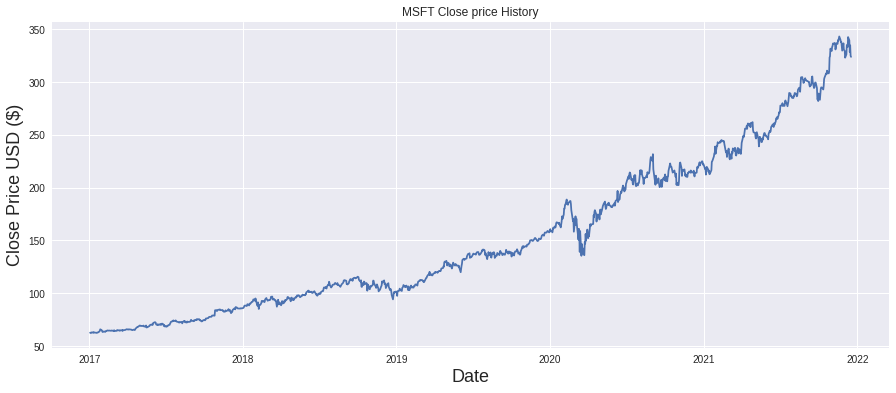

In [4]:
#Visualize the closing price
plt.figure(figsize=(15,6))
plt.title('MSFT Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,153.246024,154.677496,151.757200,153.312072,150.263262,2.852467e+07
std,74.407882,75.101537,73.742107,74.480254,75.656363,1.273203e+07
min,62.189999,62.660000,61.950001,62.299999,57.925175,7.425600e+06
25%,94.004999,95.109999,92.924999,93.875000,89.569649,2.033012e+07
50%,134.725006,135.709999,133.215004,134.399994,131.156250,2.517795e+07
75%,211.572498,214.207500,209.062500,211.572506,208.973961,3.274125e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,1.112421e+08


In [6]:
#Calculate SMA, RSI, ATR, BBands, Williams
df['SMA200'] = TA.SMA(df, 200)
df['RSI'] = TA.RSI(df)
df['ATR'] = TA.ATR(df)
df['BBWidth'] = TA.BBWIDTH(df)
df['Williams'] = TA.WILLIAMS(df)

#df.fillna(0, inplace=True)
df = df.iloc[200:, :]

In [7]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,ATR,BBWidth,Williams
Date,,,,,,,,,,,
2021-12-06,323.950012,327.450012,319.230011,326.190002,326.190002,30032600,278.37230,46.591598,7.540719,0.063635,-74.209861
2021-12-07,331.640015,335.799988,330.100006,334.920013,334.920013,31021900,278.88055,55.919659,7.858575,0.063322,-46.618183
2021-12-08,335.309998,335.500000,330.799988,334.970001,334.970001,24761000,279.38265,55.967082,7.895004,0.063223,-46.460194
2021-12-09,334.410004,336.489990,332.119995,333.100006,333.100006,22214200,279.90320,53.642123,7.826431,0.062483,-52.370416
2021-12-10,334.980011,343.000000,334.790009,342.540009,342.540009,38077300,280.45400,62.182736,8.260001,0.065491,-22.534771
2021-12-13,340.679993,343.790009,339.079987,339.399994,339.399994,28899400,280.96630,58.333058,7.873572,0.066340,-17.041976
2021-12-14,333.220001,334.640015,324.109985,328.339996,328.339996,44438700,281.43865,47.239558,8.517859,0.068868,-59.976733
2021-12-15,328.609985,335.190002,324.500000,334.649994,334.649994,35381100,281.97410,52.759416,8.977859,0.067670,-35.481410
2021-12-16,335.709991,336.760010,323.019989,324.899994,324.899994,35034800,282.46495,44.936344,9.258575,0.071303,-73.330774


In [8]:
#Create the Target column. Next day closing price
df['target'] = df.Close.shift(-1)
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,ATR,BBWidth,Williams,target
Date,,,,,,,,,,,,
2017-10-18,77.669998,77.849998,77.370003,77.610001,73.402687,13300700,69.14745,72.398070,0.692856,0.081428,-6.250046,77.910004
2017-10-19,77.570000,77.930000,77.349998,77.910004,73.686424,15092800,69.22550,74.124813,0.686428,0.084517,-0.473854,78.809998
2017-10-20,78.320000,78.970001,78.220001,78.809998,74.537643,22866400,69.30805,78.475184,0.711428,0.090518,-3.041893,78.830002
2017-10-23,78.989998,79.339996,78.760002,78.830002,74.556549,20627200,69.38800,78.561463,0.703571,0.090489,-9.058521,78.860001
2017-10-24,78.900002,79.199997,78.459999,78.860001,74.584908,17517200,69.46910,78.699350,0.684285,0.088069,-10.958813,78.629997


In [9]:
#Train test split
def train_test_split(data, perc):
  data = data.values
  n = int(len(data) *(1 - perc))
  return data[:n], data[n:]

In [10]:
train, test = train_test_split(df, 0.2)
train

array([[ 7.76699982e+01,  7.78499985e+01,  7.73700027e+01, ...,
         8.14284643e-02, -6.25004585e+00,  7.79100037e+01],
       [ 7.75699997e+01,  7.79300003e+01,  7.73499985e+01, ...,
         8.45172331e-02, -4.73853964e-01,  7.88099976e+01],
       [ 7.83199997e+01,  7.89700012e+01,  7.82200012e+01, ...,
         9.05176355e-02, -3.04189348e+00,  7.88300018e+01],
       ...,
       [ 2.45029999e+02,  2.46130005e+02,  2.42919998e+02, ...,
         1.42128727e-01, -1.51970425e+01,  2.44199997e+02],
       [ 2.41320007e+02,  2.44309998e+02,  2.40940002e+02, ...,
         1.20182114e-01, -1.30582415e+01,  2.43789993e+02],
       [ 2.41800003e+02,  2.43929993e+02,  2.40860001e+02, ...,
         1.09380455e-01, -1.58322855e+01,  2.40970001e+02]])

In [11]:
print(len(df))
print(len(train))
print(len(test))
train[0,:-1]


1049
839
210


array([ 7.76699982e+01,  7.78499985e+01,  7.73700027e+01,  7.76100006e+01,
        7.34026871e+01,  1.33007000e+07,  6.91474504e+01,  7.23980701e+01,
        6.92856380e-01,  8.14284643e-02, -6.25004585e+00])

In [12]:
#Seperate the train data into feature and target data
X = train[:,:-1]
y = train[:,-1]
y

array([ 77.91000366,  78.80999756,  78.83000183,  78.86000061,
        78.62999725,  78.76000214,  83.80999756,  83.88999939,
        83.18000031,  83.18000031,  84.05000305,  84.13999939,
        84.47000122,  84.26999664,  84.55999756,  84.08999634,
        83.87000275,  83.93000031,  84.05000305,  82.98000336,
        83.19999695,  82.40000153,  82.52999878,  83.72000122,
        83.11000061,  83.26000214,  83.87000275,  84.87999725,
        83.33999634,  84.16999817,  84.26000214,  81.08000183,
        81.58999634,  82.77999878,  82.48999786,  84.16000366,
        85.23000336,  85.58000183,  85.34999847,  84.69000244,
        86.84999847,  86.37999725,  85.83000183,  85.51999664,
        85.5       ,  85.51000214,  85.40000153,  85.70999908,
        85.72000122,  85.54000092,  85.94999695,  86.34999847,
        87.11000061,  88.19000244,  88.27999878,  88.22000122,
        87.81999969,  88.08000183,  89.59999847,  88.34999847,
        90.13999939,  90.09999847,  90.        ,  91.61

In [ ]:
#Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 6],
           'learning_rate': [0.05],
           'n_estimators': [700, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = XGBRegressor(seed = 20) 
modl = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
modl.fit(X, y)
print("Best parameters:", modl.best_params_)
print("Lowest RMSE: ", (-modl.best_score_)**(1/2.0))


#model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
#model.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[06:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:07] WARNING: /workspace/src/objective/regres

In [13]:
#Import XGBRegressor from xgboost fit X,y data into model.

from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=750, colsample_bytree=0.7, learning_rate=0.05, max_depth=3,gamma=1)
model.fit(X,y)


XGBRegressor(colsample_bytree=0.7, gamma=1, learning_rate=0.05,
             n_estimators=750, objective='reg:squarederror')

In [14]:
#Check the test set first item
test[0,:]
#val = np.array(test[0, :-1]).reshape(1, -1)


array([ 2.43750000e+02,  2.43860001e+02,  2.40179993e+02,  2.40970001e+02,
        2.39517288e+02,  2.52626000e+07,  2.10854350e+02,  5.98064285e+01,
        4.01214273e+00,  9.49892591e-02, -3.76642267e+01,  2.34509995e+02])

In [ ]:
#Let's see what our model predict # model.predic need 2d array that's why we do reshape
val = np.array(test[0, :-1]).reshape(1, -1)
pred = model.predict(val)
pred

array([240.47543], dtype=float32)

In [15]:
#Predict Method def
# Separete the train set into feature(X) and target (y) and predict one sample at a time.
#model = XGBRegressor(objective='reg:squarederror', n_estimators=350, learning_rate=0.05, colsample_bytree=0.7,max_depth=3,gamma=5)
def xgb_predict(train, val):
  train = np.array(train)
  X, y = train[:, :-1], train[:,-1]
  model = XGBRegressor(objective='reg:squarederror', n_estimators=750, learning_rate=0.05, colsample_bytree=0.7,max_depth=3,gamma=5)
  model.fit(X,y)
  val = np.array(val).reshape(1, -1)
  pred = model.predict(val)
  return pred[0]

In [16]:
xgb_predict(train, test[0, :-1])


240.94344

In [17]:
#Mean Absolute Percentage Error(MAPE)
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  mape = np.mean(np.abs((actual-pred)/actual))*100
  return mape

In [18]:
#Walk forward validation
#Since we are making Next day price prediciton. We will predict first record of test dataset
#After that we add real observation from test dataset and refit the model and then predict the next observation from test set. and so on. 

from sklearn.metrics import mean_squared_error

def validate(data, perc):
  predictions = []
  train, test = train_test_split(data, perc)
  history = [x for x in train]

  for i in range(len(test)):
    X_test, y_test = test[i, :-1], test[i, -1]
    pred = xgb_predict(history, X_test)
    predictions.append(pred)

    history.append(test[i])

  error = mean_squared_error(test[:, -1], predictions, squared=False) 
  MAPE = mape(test[:,-1], predictions)
  return error, MAPE, test[:, -1], predictions



In [19]:

rmse, MAPE, y, pred = validate(df, 0.2)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [20]:
print("RMSE: " f'{rmse}')
print("MAPE: " f'{MAPE}')
print(y)
print(pred)

RMSE: 4.096993873490079
MAPE: 1.1339287329463676
[234.50999451 233.27000427 234.55000305 228.99000549 232.38000488
 236.94000244 233.86999512 227.55999756 226.72999573 231.6000061
 227.38999939 233.77999878 232.41999817 237.13000488 235.75
 234.80999756 237.71000671 237.03999329 230.72000122 230.3500061
 235.99000549 237.58000183 235.46000671 232.33999634 236.47999573
 235.24000549 231.8500061  235.77000427 242.3500061  249.07000732
 247.86000061 249.8999939  253.25       255.8500061  255.91000366
 258.48999023 255.58999634 259.5        260.73999023 258.73999023
 258.26000977 260.57998657 257.17001343 261.1499939  261.54998779
 261.97000122 254.55999756 252.50999451 252.17999268 251.86000061
 247.78999329 246.47000122 249.72999573 252.46000671 247.17999268
 246.22999573 239.         243.02999878 248.1499939  245.17999268
 243.08000183 243.11999512 246.47999573 245.16999817 250.77999878
 251.72000122 251.49000549 249.30999756 249.67999268 247.3999939
 247.30000305 245.71000671 250.78999

In [21]:
# Add test and pred array.
pred = np.array(pred)
test_pred = np.c_[test,pred]


In [22]:
df_TP = pd.DataFrame(test_pred, columns=['Open', 'High','Low','Close','Adj Close','Volume','SMA200','RSI','ATR','BBWidth','Williams','Target','Pred'])

Text(0, 0.5, 'Price in USD $')

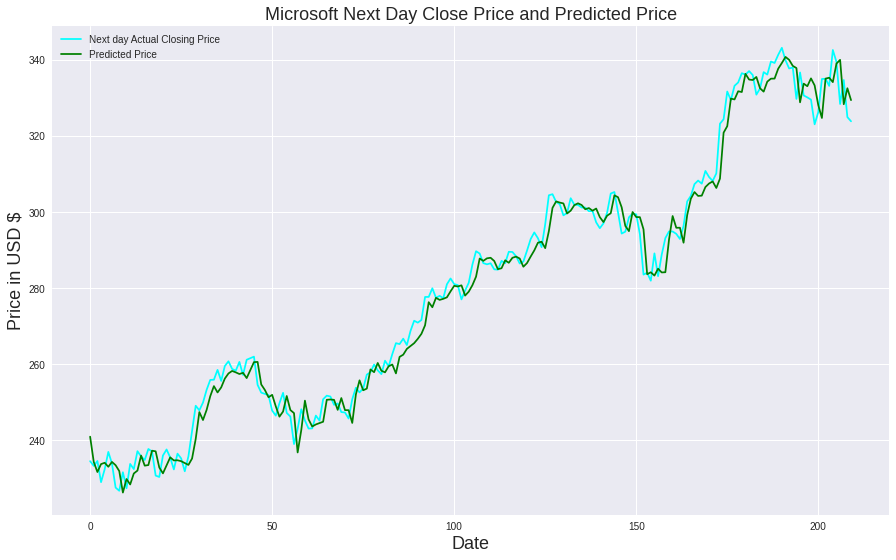

In [27]:
#Show the close price
plt.figure(figsize= (15, 9))
plt.title('Microsoft Next Day Close Price and Predicted Price' , fontsize = 18)
#plt.subplot(211)
plt.plot(df_TP['Target'], label= "Next day Actual Closing Price", color= 'cyan')
plt.plot(df_TP['Pred'], label="Predicted Price", color = 'green', alpha=1)
#plt.plot(df_TP['Close'], label='Close Price', color = 'orange', alpha=.5)
plt.xlabel('Date', fontsize = 18)
plt.legend(loc = "upper left")
plt.ylabel('Price in USD $', fontsize = 18)




In [28]:
df_TP

,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,ATR,BBWidth,Williams,Target,Pred
0,243.750000,243.860001,240.179993,240.970001,239.517288,25262600.0,210.85435,59.806428,4.012143,0.094989,-37.664227,234.509995,240.943436
1,237.419998,237.929993,232.399994,234.509995,233.096237,36446900.0,211.11420,47.827088,3.871429,0.081395,-84.632200,233.270004,234.293182
2,230.330002,234.830002,228.729996,233.270004,231.863708,30228700.0,211.36255,45.925531,4.048573,0.075347,-73.908011,234.550003,231.652451
3,230.009995,235.199997,229.000000,234.550003,233.136002,26339700.0,211.61190,48.214397,4.075001,0.072377,-66.551700,228.990005,233.741791
4,232.080002,234.589996,227.880005,228.990005,227.609512,39542200.0,211.82315,40.245548,4.349286,0.079323,-93.917805,232.380005,234.082321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,334.980011,343.000000,334.790009,342.540009,342.540009,38077300.0,280.45400,62.182736,8.260001,0.065491,-22.534771,339.399994,338.962128
206,340.679993,343.790009,339.079987,339.399994,339.399994,28899400.0,280.96630,58.333058,7.873572,0.066340,-17.041976,328.339996,339.940369
207,333.220001,334.640015,324.109985,328.339996,328.339996,44438700.0,281.43865,47.239558,8.517859,0.068868,-59.976733,334.649994,328.276642
208,328.609985,335.190002,324.500000,334.649994,334.649994,35381100.0,281.97410,52.759416,8.977859,0.067670,-35.481410,324.899994,332.483887
